# 笹川真生とキタニタツヤの顔画像を見分けるAIを作る(CNN)
笹川真生 -> https://www.youtube.com/channel/UCd0oSpX1KiQ0pBl8g4XcwOQ/videos  
キタニタツヤ -> https://www.youtube.com/channel/UCgP3GbgbuVzAhlctGU5yuPA

# CNNを実装

In [1]:
import numpy as np
import pandas as pd
import time

# 真生とキタニの画像データの読み込み

In [2]:
df_mao = pd.read_csv("C:/Users/kisho/Documents/csv/mao_50x50img_data.csv", header=None).astype(int)
df_mao

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,97,101,88,89,94,80,74,78,65,82,...,247,248,250,251,254,254,254,254,254,254
1,71,77,64,67,72,61,70,73,66,72,...,246,242,246,248,252,253,253,254,254,254
2,61,65,57,63,66,61,66,67,66,62,...,246,240,244,247,247,249,251,254,254,254
3,55,57,54,59,60,61,69,70,72,61,...,247,240,244,247,243,246,249,251,252,253
4,65,67,67,85,88,90,74,77,79,55,...,244,238,242,245,240,244,247,246,249,251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,155,156,149,156,155,149,158,155,151,158,...,19,17,17,20,18,17,21,18,18,21
29996,155,156,149,156,155,148,157,156,150,156,...,19,16,16,19,17,17,20,17,17,20
29997,154,156,146,155,156,147,155,156,149,151,...,18,16,16,19,16,16,19,16,16,19
29998,154,156,146,154,156,146,156,156,149,151,...,18,15,15,18,16,16,19,16,16,19


In [3]:
df_kitani = pd.read_csv("C:/Users/kisho/Documents/csv/kitani_50x50img_data.csv", header=None).astype(int)
df_kitani

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,126,136,145,83,89,99,76,83,93,73,...,139,145,139,146,121,121,124,186,186,187
1,126,134,144,80,87,98,93,102,111,97,...,123,140,136,145,109,109,115,139,140,144
2,107,116,126,94,103,112,109,118,127,125,...,94,109,107,116,100,100,109,97,99,106
3,92,101,110,112,122,131,131,141,150,132,...,68,79,77,87,88,89,99,72,76,83
4,113,123,132,137,147,156,153,164,172,138,...,65,55,53,63,63,67,78,64,68,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,129,130,132,124,127,129,92,93,95,84,...,12,12,12,12,12,12,12,14,14,13
19996,108,112,114,104,106,109,97,97,99,124,...,11,12,12,12,12,12,12,13,13,12
19997,82,84,87,102,104,106,116,116,116,158,...,11,11,11,11,11,11,11,10,10,10
19998,81,81,81,96,94,95,98,96,96,95,...,14,13,13,13,12,12,12,12,12,12


# データの成型

In [4]:
X = np.vstack([np.array(df_mao, dtype=np.int32), np.array(df_kitani, np.int32)])
del df_mao, df_kitani
X = X.reshape(50000, 50, 50, 3)

print(X)

[[[[ 97 101  88]
   [ 89  94  80]
   [ 74  78  65]
   ...
   [254 254 254]
   [254 254 254]
   [254 254 254]]

  [[146 148 131]
   [157 160 140]
   [147 151 129]
   ...
   [255 253 254]
   [255 253 254]
   [254 254 254]]

  [[163 164 146]
   [168 171 150]
   [177 180 160]
   ...
   [253 254 255]
   [254 254 254]
   [255 253 254]]

  ...

  [[139 138 135]
   [124 125 123]
   [170 171 171]
   ...
   [251 252 253]
   [252 252 252]
   [253 253 253]]

  [[243 239 229]
   [204 200 194]
   [177 171 166]
   ...
   [253 254 254]
   [253 253 253]
   [253 253 253]]

  [[205 194 182]
   [200 187 177]
   [191 177 166]
   ...
   [248 250 251]
   [254 254 254]
   [254 254 254]]]


 [[[ 71  77  64]
   [ 67  72  61]
   [ 70  73  66]
   ...
   [254 254 254]
   [254 254 254]
   [254 254 254]]

  [[132 135 118]
   [123 128 109]
   [112 115  99]
   ...
   [255 253 254]
   [255 253 254]
   [255 253 254]]

  [[160 162 143]
   [170 173 150]
   [179 182 163]
   ...
   [252 255 255]
   [253 254 254]
   [254 254

In [5]:
print(X.shape)

(50000, 50, 50, 3)


# 正解ラベルの作成

In [6]:
# 30000枚のmaoデータの正解ラベルは1
y_mao = np.ones(30000)
print(y_mao)
print(y_mao.shape)

[1. 1. 1. ... 1. 1. 1.]
(30000,)


In [7]:
# 20000枚のキタニの正解ラベルは0
y_kitani = np.zeros(20000)
print(y_kitani)
print(y_kitani.shape)

[0. 0. 0. ... 0. 0. 0.]
(20000,)


In [8]:
y = np.concatenate([y_mao, y_kitani])
del y_mao, y_kitani
print(y)
print(y.shape)

[1. 1. 1. ... 0. 0. 0.]
(50000,)


# CNN実装

In [9]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)
del X, y

In [12]:
# スケーリング
X_train_scaled = np.array(X_train / 255, dtype=np.float32)
del X_train

X_test_scaled = np.array(X_test / 255, dtype=np.float32)
del X_test

In [13]:
# one-hot-labeling
y_train_cat = np_utils.to_categorical(y_train)
del y_train

y_test_cat = np_utils.to_categorical(y_test)
del y_test

In [15]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train_cat.shape)

(37500, 50, 50, 3)
(12500, 50, 50, 3)
(37500, 2)


In [16]:
from keras import models, layers
from keras.callbacks import EarlyStopping

In [20]:
cnn_01 = models.Sequential()

# 50x50x32 -> 46x46x32
cnn_01.add(layers.Conv2D(32, kernel_size=(5,5), strides=(1,1), padding="valid", activation="relu", input_shape=(50, 50, 3)))
# 46x46x32 -> 23x23x32
cnn_01.add(layers.MaxPooling2D(pool_size=(2,2), strides=None, padding="valid"))
# 23x23x32 -> 20x20x16
cnn_01.add(layers.Conv2D(16, kernel_size=(4,4), strides=(1,1), activation="relu", padding="valid"))
# 20x20x16 -> 10x10x16
cnn_01.add(layers.MaxPooling2D(pool_size=(2,2), strides=None, padding="valid"))
# 10x10x16 -> 10x10x8
cnn_01.add(layers.Conv2D(8, kernel_size=(3,3), strides=(1,1), activation="relu", padding="same"))
# 10x10x8 -> 5x5x8
cnn_01.add(layers.MaxPooling2D(pool_size=(2,2), strides=None, padding="valid"))
# 5x5x8 -> 200
cnn_01.add(layers.Flatten())
# 200
cnn_01.add(layers.Dense(200, activation="relu"))
# 200 -> 64
cnn_01.add(layers.Dense(64, activation="relu"))
# 64 -> 32
cnn_01.add(layers.Dense(32, activation="relu"))
# 32 -> 2
cnn_01.add(layers.Dense(2, activation="softmax"))

cnn_01.compile(optimizer="adam",
               loss="categorical_crossentropy",
               metrics=["accuracy"])

cnn_01.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 46, 46, 32)        2432      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 20, 20, 16)        8208      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 8)         1160      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 200)              

In [22]:
callbacks = [EarlyStopping(monitor="val_accuracy", patience=5)]

t0 = time.time()

his_01 = cnn_01.fit(x=X_train_scaled,
                    y=y_train_cat,
                    epochs=50,
                    batch_size=512,
                    verbose=1,
                    callbacks=callbacks,
                    validation_data=(X_test_scaled, y_test_cat))

t1 = time.time()
print(t1 - t0)

Epoch 1/50
74/74 [==============================] - 99s 1s/step - loss: 0.0256 - accuracy: 0.9923 - val_loss: 0.0094 - val_accuracy: 0.9987
Epoch 2/50
74/74 [==============================] - 96s 1s/step - loss: 0.0016 - accuracy: 0.9999 - val_loss: 3.4762e-04 - val_accuracy: 1.0000
Epoch 3/50
74/74 [==============================] - 94s 1s/step - loss: 2.0127e-04 - accuracy: 1.0000 - val_loss: 1.4549e-04 - val_accuracy: 1.0000
Epoch 4/50
74/74 [==============================] - 94s 1s/step - loss: 8.6043e-05 - accuracy: 1.0000 - val_loss: 6.8943e-05 - val_accuracy: 1.0000
Epoch 5/50
74/74 [==============================] - 93s 1s/step - loss: 4.1559e-05 - accuracy: 1.0000 - val_loss: 3.2015e-05 - val_accuracy: 1.0000
Epoch 6/50
74/74 [==============================] - 96s 1s/step - loss: 2.1943e-05 - accuracy: 1.0000 - val_loss: 1.9121e-05 - val_accuracy: 1.0000
Epoch 7/50
74/74 [==============================] - 93s 1s/step - loss: 1.3988e-05 - accuracy: 1.0000 - val_loss: 1.3129e-05

# 判別できるか検証

In [25]:
import glob
import matplotlib.pyplot as plt
import cv2

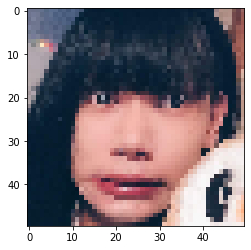

これは笹川真生


In [59]:
img = cv2.imread("C:/Users/kisho/Desktop/mao_test(1).jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (50, 50))

plt.imshow(img)
plt.show()

img = img.reshape(1, 50, 50, 3)
img_scaled = img / 255

results = cnn_01.predict(img_scaled)
if np.argmax(results) == 1:
    print("これは笹川真生")
else:
    print("これはキタニタツヤ")

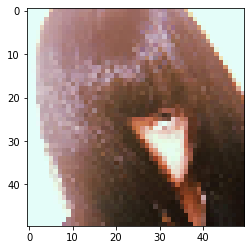

これは笹川真生


In [60]:
img = cv2.imread("C:/Users/kisho/Desktop/mao_test(2).jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (50, 50))

plt.imshow(img)
plt.show()

img = img.reshape(1, 50, 50, 3)
img_scaled = img / 255

results = cnn_01.predict(img_scaled)
if np.argmax(results) == 1:
    print("これは笹川真生")
else:
    print("これはキタニタツヤ")

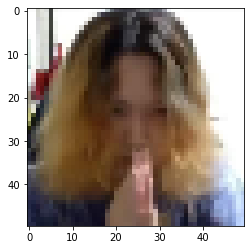

これはキタニタツヤ


In [61]:
img = cv2.imread("C:/Users/kisho/Desktop/kitani_test(1).jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (50, 50))

plt.imshow(img)
plt.show()

img = img.reshape(1, 50, 50, 3)
img_scaled = img / 255

results = cnn_01.predict(img_scaled)
if np.argmax(results) == 1:
    print("これは笹川真生")
else:
    print("これはキタニタツヤ")

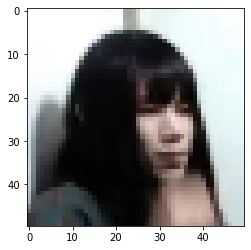

これは笹川真生


In [62]:
img = cv2.imread("C:/Users/kisho/Desktop/mao_test(3).jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (50, 50))

plt.imshow(img)
plt.show()

img = img.reshape(1, 50, 50, 3)
img_scaled = img / 255

results = cnn_01.predict(img_scaled)
if np.argmax(results) == 1:
    print("これは笹川真生")
else:
    print("これはキタニタツヤ")

### 全問正解